## Introduction

Predict who will survive or die in the Titanic dataset. Familiarize myself with Python data analysis.

### Modeling Framework

1. Framing the problem
    - What are we trying to solve? 
    - Understand the problem.
2. Collecting relevant information & data
    - What data do we have?
    - Gathering any other requirements and understanding success.
3. Process for analysis (Preprocessing & Cleaning)
    - Is the data usable? Can it be plotted?
    - Check for common errors like: missing values, corrupted values, dates
4. Explore the data (Exploratory data analysis)
    - How does the data look like? 
    - Patterns? Plots? Summary statistics? 
    - Get familiar with the data.
5. Feature Engineering (Applied Machine Learning)
    - Can we create more features that will be helpful for the model?
6. Statistical Analysis
    - Multivariate/Bivariate analysis on features
7. Modeling
    - Train vs. Test
    - Should we standardize?
    - What models should we use? 
        - Classification
    - Pre-tuning vs. tuning
        - Are we tuning the models?
8. Evaluation & Scoring
    - How accurate are the models?
    - Should we reiterate again?
9. Results & Productionize
    - Can we create the entire dataset and prediction on a website?

### Framing the problem

Predict the passenger survival rate using the train and test data.

### Collecting relevant data

In [62]:
''' Set directory for the data '''

import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 'house']

### Import libraries & data

In [63]:
'''Import data analysis & visualization libraries'''
import pandas as pd
import numpy as np
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
'''Import the train and test data'''

train = pd.read_csv('07-train.csv')
test = pd.read_csv('07-test.csv')

'''Create a column to distinguish the two datasets'''
train['DataType'] = 'Train'
test['DataType'] = 'Test'

'''Combine the datasets'''
comb = [train, test]
combined = pd.concat(comb, sort='False')

### Preprocessing

Are we able to use the data right away? What type of issues does the data have? How do we fix the issues?

Count the nulls in each column and identify the data types as well.

In [65]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train..fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''

"\n\nSome functions to start off with:\n\ntrain.sample()                                           \ntrain.describe()\n    train.describe(include=['O'])\n    train.describe(include='all')\ntrain.head()\ntrain.tail()\ntrain.value_counts().sum()\ntrain.isnull().sum()\ntrain.count()\ntrain.fillna()\n    train..fillna(train[col].mode(), inplace=True)\ntrain.mean()\ntrain.median()\ntrain.mode()\ntrain.shape\ntrain.info()\n\n"

In [66]:
'''Get data shape, info, columns, & dimensions'''
print ("*"*40)
print('********** train shape: ' + str(train.shape) + '*'*10)
print (train.info())
print ("*"*40)
print('********** test shape: ' + str(test.shape) + '*'*10)
print (test.info())

****************************************
********** train shape: (891, 13)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
DataType       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
****************************************
********** test shape: (418, 12)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null objec

### Feature descriptions
1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The Age and Fare variable are continuous quantitative datatypes.
7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

How does the survival distribution look like before we explore.

In [67]:
'''Overview of the data between survived and did not survive'''
survived_summary = combined.groupby('Survived')
survived_summary.mean().reset_index()

,Survived,Age,Fare,Parch,PassengerId,Pclass,SibSp
0,0.0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,1.0,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


### Are there null values?

In [68]:
combined.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
DataType          0
dtype: int64

In [69]:
''' The function value_counts() is a series method so we have to use count() instead'''
combined.count()

Age            1046
Cabin           295
DataType       1309
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

In [70]:
'''Get null percentage per column'''
totalnull = combined.isnull().sum().sort_values(ascending=False)
percentnull = round(combined.isnull().sum().sort_values(ascending=False)/len(combined)*100,2)

'''Combine horizontally (axis=1) into a dataframe with column names (keys=[])'''
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,1014,77.46
Survived,418,31.93
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08
Ticket,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00


### Ways to clean up null values

There are several methods on how to handle missing values. There are always some instance where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted, and more. So understanding a couple methods in handling the NULL/NaN values are crucial. Pandas provides a dropna() function that can be used to drop either columns or rows with missing data.

Some methods are listed below:

1. Removing the rows with missing values using dropna() function
    - inplace parameter: If True, do operation inplace and return None.
    - axis parameter: drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
2. Impute the missing values using fillna():
    - Constant value that has meaning within the domain; ex: 0 for not present
    - Value from another randomly selected record (could be random or have the business acumen to figure out a value)
    - Mean, median, mode
    - Value estimated by a predictive model
3. Binning
    - Binning the values that are not present which could provide insight
4. Ignore and leave it as it is

### Embarked

There are a total of 2 null values. Let's explore the feature.

In [71]:
'''Create dataframes of Embarked values'''
embarked_n = pd.DataFrame(combined.Embarked.value_counts(dropna=False))
embarked_p = pd.DataFrame(round(combined.Embarked.value_counts(dropna=False)/len(combined)*100,2))

'''Rename dataframe columns'''
embarked_n.columns = ['Total']
embarked_p.columns = ['Percent']

'''Combine the dataframes together'''
pd.concat([embarked_n, embarked_p], axis=1) # keys=['Total', 'Percent'])

,Total,Percent
S,914,69.82
C,270,20.63
Q,123,9.40
NaN,2,0.15


Another way we can build a percentage column is to use the normalize parameter and passing index, columns, or all as the argument.

In [72]:
'''Use crosstab() from pandas and name the indexes & columns'''
embarked_survival_table = pd.crosstab(index=combined['Embarked'],
                                     columns=combined['Survived'],
                                     normalize='all',
                                     margins=True)

'''Add names for the crosstab'''
embarked_survival_table.columns = ['Did not Survive', 'Survived', 'RowTotal']
embarked_survival_table.index = ['C', 'Q', 'S', 'ColTotal']

embarked_survival_table

'''
Without normalize parameter
embarked_survival_table/embarked_survival_table.loc['ColTotal', 'RowTotal']
'''

"\nWithout normalize parameter\nembarked_survival_table/embarked_survival_table.loc['ColTotal', 'RowTotal']\n"

Looks like a majority of the people boarded from S (Southampton). The others are C (Cherbourg) and Q (Queenstown). Is there a wealth inequality between the three areas? What's the survival rate between the 3?

But first, what are the null values.

In [73]:
'''Slice the dataframe to get null Embarked rows'''
combined[combined.Embarked.isnull()]

,Age,Cabin,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,Train,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,Train,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Both the null values are females from the same cabin. I would think they would be related but their last names are not the same. They are also female and also survived. I can try to do a random forest to see if it predicts them to be in the higher survival Embarked group of females or I can use business acumen to place them within a group of females that survived and paid a $80 Fare that is also 1st class or just about. 

Here's a picture below of the locations. Looks like Queenstown was the last city.

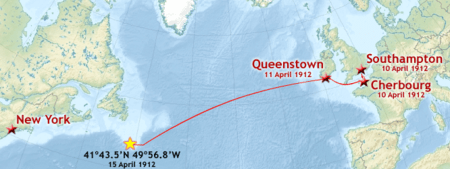

In [74]:
from IPython.display import Image
url = 'https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png'
Image(url,width=600, height=800)

In [75]:
'''Group by survival rate and embarked'''
combined.groupby(['Survived', 'Embarked']).Embarked.count()

Survived  Embarked
0.0       C            75
          Q            47
          S           427
1.0       C            93
          Q            30
          S           217
Name: Embarked, dtype: int64

#### This is a little hard to read, let's try another way.

In [76]:
combined[['Embarked', 'Sex', 'Survived']].groupby(['Embarked', 'Sex']).mean()

Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603

So it looks like Cherbourg has the highest survival rate out of the grouped attributes. So I will group the null values of the two to be from Cherbourg.

We can use the fillna() function to input the 'C' values where Embarked is null.

### Using value_counts(normalize=True) to get frequency percentage

In [77]:
round(combined.Embarked.value_counts(normalize=True)*100,2)

S    69.93
C    20.66
Q     9.41
Name: Embarked, dtype: float64

In [78]:
combined['Embarked'].fillna('C', inplace=True) # Using inplace() for memory

In [79]:
combined.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
Embarked          0
DataType          0
dtype: int64

Let's take a look visually now that we have all values in the feature populated. We can use matplotlib and its functions to:
1. Create a figure space
2. Plot the data
3. Update any figure settings

**Before modeling, create plots togther in 1 figure space that will pair up the train vs. test distributions to see if distributions vary a lot.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F7A855C1D0>,
      dtype=object)

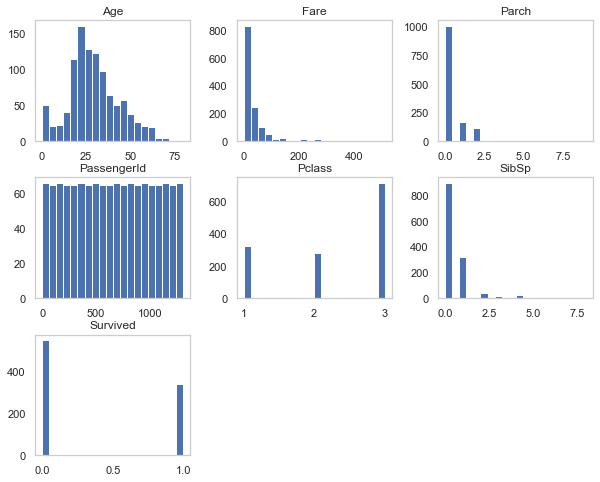

In [80]:
sns.set_style('whitegrid')
combined.hist(bins=20, figsize=(10,8), label='DataType', grid=False)

(figure out how to get the density plots) **************************************************

### Embarked box plot

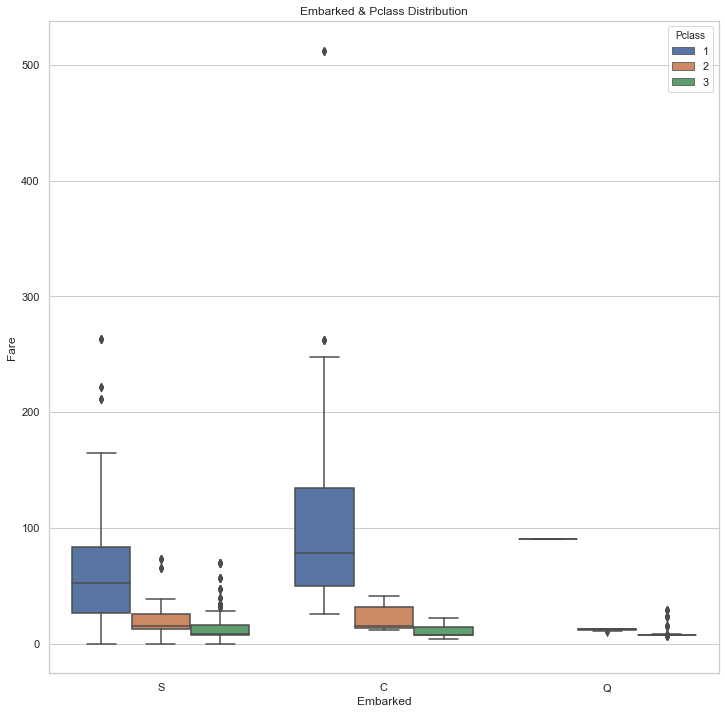

In [81]:
'''Use either plt.figure() or plt.subplots()'''
fig, ax = plt.subplots(figsize=(12,12)) # ncols=1, nrows=1

'''Step 2: Figure out what type of plots to use'''
ax1 = sns.boxplot(x='Embarked',
                  y='Fare',
                  hue='Pclass',
                  data=combined)
                  #ax=ax[0])

'''Step3: Set any figure settings'''
ax1.set_title('Embarked & Pclass Distribution', fontsize=12)

'''Show figure'''
plt.show()

### Embarked count plot

Another plot that will show counts survival counts are greater than deaths in Cherbourg.

Some steps to get familiar with:
1. Create any argument dictionaries/lists like colors
2. Set grid/plot style using sns.set()
3. Set figure size if needed
4. Create figure using plt functions or base functions
5. Adjust any plot features like title, xlabel, ylabel, legend

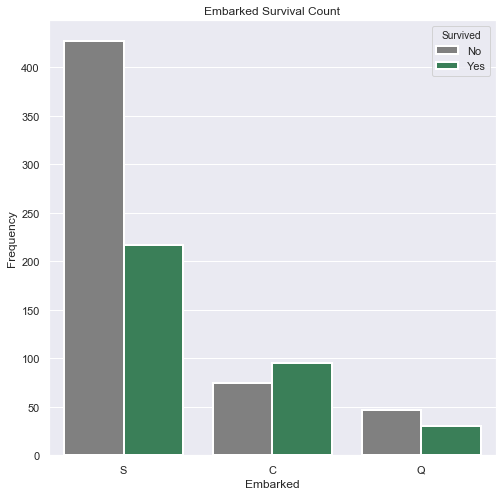

In [82]:
# Create color palette
colors = {1:'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Set figure size
fig = plt.figure(figsize=(8,8)) # ncols=1, nrows=1

# Create countplot()
ax = sns.countplot(x='Embarked',
                  hue='Survived',
                  data=combined,
                  linewidth=2,
                  palette=colors)

# Set titles and labels
plt.title('Embarked Survival Count')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

# Add legend and set
legend = ax.get_legend()
legend.set_title('Survived')
legend_txt = legend.texts
legend_txt[0].set_text('No')
legend_txt[1].set_text('Yes')

### Defining functions that will plot a table and graph

Found this from eraaz1 kernel which is neat, still have trouble getting two plots to show.

In [278]:
def pct_bar_labels():
    '''
    Function to label on top of the bar plot of relative frequency
    '''
    # Set font size
    font_size=12
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency: (%)', fontsize=font_size)
    plt.xticks(rotation=0, fontsize=font_size)
    plt.yticks([])
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=font_size, color='black')
    
def freq_table(var):
    '''
    Define global variables
    Create function that will populate a frequency table with %
    First get the counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100,2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Set figure
    fig_size=(15,8)
    font_size=12
    title_size=15
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels()
    plt.show()

### Use the new function to plot Embarked feature

Frequency of Embarked :


,Count,Percentage
S,914,69.82
C,272,20.78
Q,123,9.40


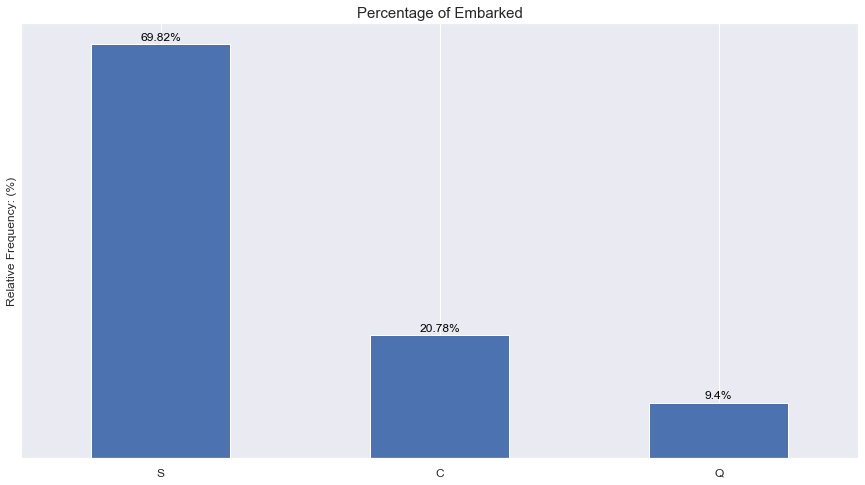

In [279]:
freq_table(combined.Embarked)

### Cabin feature

This is one feature that has a lot of nulls so we should take a look at it deeper to see what we can do with it.
1. How many nulls are there?
2. Can we infer anything from the feature?

In [137]:
# Get null count
cabin_freq = combined.Cabin.isnull().sum()

# Get proportion of null count
cabin_pct = round(combined.Cabin.isnull().sum()/len(combined)*100,2)

'''
Could also do a concat like this:

    cabin_freq.columns=['Frequency']
    cabin_pct.columns=['Percentage']

    pd.concat([cabin_freq, cabin_pct], axis=1)

Other tips: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
'''

# Create df
cabin_df = pd.DataFrame({'Nulls': cabin_freq,
                         'Percnt': cabin_pct},
                         columns=['Null Count', 'Percentage'],
                         index=[0])

# Print cabin_df type
print(type(cabin_df))

# Print output
cabin_df

<class 'pandas.core.frame.DataFrame'>


,Null Count,Percentage
0,NaN,NaN


In [138]:
print('Cabin Missing Values Proportion: ' + str(combined.Cabin.isnull().sum()/len(combined.Cabin)*100))

Cabin Missing Values Proportion: 77.46371275783041


Getting NaN values above so I need to look into that. The Cabin feature has a lot of null values the first thought for me is to remove it but there can always be something useful that is not shown.

- We can either not use this feature at all
- Discover methods to utilize feature engineering to make it usable
- Ask questions like:
    - Why are there so many missing Cabin values?
    - Survival rate of people with Cabins?
    - Socioeconomic status of Cabins?
    - Cabins closest to lifeboats?

We can see if we can group the fares with the cabin's letter.

In [143]:
# First we have to fill in the missing values so we don't get a subscriptable error
combined.Cabin.fillna('N', inplace=True)

# Loop through every row
combined['CabinValue'] = [i[0] for i in combined.Cabin]
combined.CabinValue[0:5]

['N', 'C', 'N', 'C', 'N']

In [149]:
# Summarize cabin counts
combined.groupby('CabinValue').size().sort_values(ascending=False) # groupby()'s equivalent for value_counts()

CabinValue
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
dtype: int64

In [188]:
# Average fare per cabin letter
cvfare = combined.groupby('CabinValue')['Fare'].mean().sort_values(ascending=False)

cvfare_df = pd.DataFrame(cvfare)

# cvfare_df.reset_index(inplace=True)
# cvfare_df.set_index('CabinValue', drop=False, inplace=True)

cvfare_df

,Fare
CabinValue,
B,122.383078
C,107.926598
E,54.564634
D,53.007339
A,41.244314
T,35.500000
N,19.132707
F,18.079367
G,14.205000


In [161]:
# Group it alongside with Survived
combined[['CabinValue', 'Survived']].groupby(['CabinValue']).mean().sort_values(ascending=False, by='Survived')

,Survived
CabinValue,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
N,0.299854
T,0.000000


Surprisingly the survival rate isnt as correlated with the fares as I thought. C has a pretty high rate but only 59% survived. B has an abnormally high average fare too and it has a high survival rate which makse sense. The next bests are E and D which have a little over 53 in fares before it takes another small dip. We can attempt a statistical method to see if there is a relevancy between the two features. 

### Some statistical tests

#### T-test
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

- Calculate the T-test for the means of two independent samples of scores.
- We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
- Ex: stats.ttest_ind(rvs1,rvs2, equal_var = False)

#### ANOVA
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
- If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) although with some loss of power.
- Ex: stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

#### Linear regression
This test works as well and is a lot easier to implement.

Fare = dependent variable (numerical)

CabinValue = independent variable (categorical)

In [206]:
# Import the test method from scipy
import scipy.stats as stats

# Average fare per cabin letter
cv_data = combined.CabinValue
fare_data = combined.Fare

# Group fare data by cabin value
cvfare_df = pd.DataFrame({"CabinValue":cv_data, "Fare":fare_data})
groups = cvfare_df.groupby("CabinValue").groups
groups

# Extract individual groups
B_grp = fare_data[groups['B']]
C_grp = fare_data[groups['C']]
E_grp = fare_data[groups['E']]
D_grp = fare_data[groups['D']]
A_grp = fare_data[groups['A']]
T_grp = fare_data[groups['T']]
N_grp = fare_data[groups['N']]
F_grp = fare_data[groups['F']]
G_grp = fare_data[groups['G']]

# ANOVA
stats.f_oneway(B_grp, C_grp, E_grp, D_grp, A_grp, T_grp, N_grp, F_grp, G_grp)

F_onewayResult(statistic=nan, pvalue=nan)

Well, looks like my statistical analysis needs some reviewing... let's try a linear regression.

In [247]:
# Import model and perform linear regression
'''
With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) 
as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. 

Get new dataframe without the null value: combined[combined['Fare'].notnull()].Fare.isnull().sum()
'''

from sklearn.linear_model import LinearRegression

# Drop NA fare
cv_fare_combined = combined[combined['Fare'].notnull()]

# Get x and y variables
fare_y = pd.DataFrame(cv_fare_combined.Fare, columns=['Fare'])
cv_x = cv_fare_combined.CabinValue
cv_x = pd.DataFrame((i for i in cv_x), columns=['CabinVal'])
cv_x_copy = cv_x.copy()

# Get dummies
cv_x = pd.get_dummies(cv_x, columns=['CabinVal'])
                                           
# Fit and score the model
lm = LinearRegression().fit(cv_x, fare_y)
lm_score = lm.score(cv_x, fare_y)

# Print coefficients
print('Linear Regression Score: ' + str(lm_score))
print('Intercept: ' + str(lm.intercept_))
print('Coefficient: ' + str(lm.coef_))

Linear Regression Score: 0.36704455147123405
Intercept: [8.64005398e+14]
Coefficient: [[-8.64005398e+14 -8.64005398e+14 -8.64005398e+14 -8.64005398e+14
  -8.64005398e+14 -8.64005398e+14 -8.64005398e+14 -8.64005398e+14
  -8.64005398e+14]]


It looks like there isn't a strong association between the fare feature and the cabin feature.

In [248]:
# Get count of a dataframe column
cv_x_copy['CabinVal'].value_counts()

# Print data info
print(type(cv_x))
print(type(fare_y))
print(type(cv_x.info()))

N    1013
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinVal, dtype: int64

Let's look at the median values instead of the mean since there might be skewness involved.

In [250]:
combined.groupby('CabinValue')['Fare'].median().sort_values(ascending=False)

CabinValue
C    86.2896
B    82.2667
E    53.1000
D    52.5542
T    35.5000
A    35.0771
G    16.7000
F    13.0000
N    10.5000
Name: Fare, dtype: float64

In [251]:
# Create a function to group cabins
def cabin_grouping(x):
    letter = 0
    if x<16:
        letter='G'
    elif x>=16 and x<26:
        letter='F'
    elif x>=27 and x<38:
        letter='T'
    elif x>=38 and x<47:
        letter='A'
    elif x>=47 and x<53:
        letter='E'
    elif x>=53 and x<54:
        letter='D'
    elif x>=54 and x<116:
        letter='C'
    else:
        letter='B'
    return letter

In [257]:
# Apply the cabin function into each unknown cabins
combined['CabinValue'] = combined.Fare.map(lambda x:cabin_grouping(x))
combined.drop('Cabin', axis=1, inplace=True)

combined.shape

(1309, 13)

### Fare feature

There is one null value.

In [259]:
combined[combined.isnull().Fare]

,Age,DataType,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinValue
152,60.5,Test,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,B


We can do a dirty method and just add in an average failure for the passenger type based on cabin, age, sex, etc.

In [261]:
# Get attributes and index the values to get the mean
missing_fare = round(combined[(combined.Pclass==3) & (combined.Embarked=='S') & (combined.Sex=='male')].Fare.mean(),2)
print('Avg Fare for Pclass = 3, Embarked = S, Sex = M: ' + str(missing_fare))

# Replace null fare
combined.Fare.fillna(missing_fare, inplace=True)

Avg Fare for Pclass = 3, Embarked = S, Sex = M: 13.15


### Fare - jitter

Text(0.5, 1.0, 'Fare Distribution vs. Pclass')

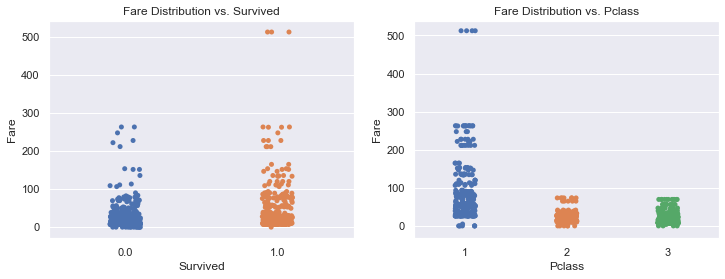

In [274]:
# Create figure space
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

ax1 = sns.stripplot(x="Survived",
                    y="Fare",
                    data=combined,
                    jitter=True,
                    ax=ax[0])

ax2 = sns.stripplot(x="Pclass",
                    y="Fare",
                    data=combined,
                    jitter=True,
                    ax=ax[1])

# Set figure features
ax1.set_title('Fare Distribution vs. Survived')
ax2.set_title('Fare Distribution vs. Pclass')

Looks like there are a few fare outliers that can skew the data. We will most likely standardized the entire dataset before modeling.

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


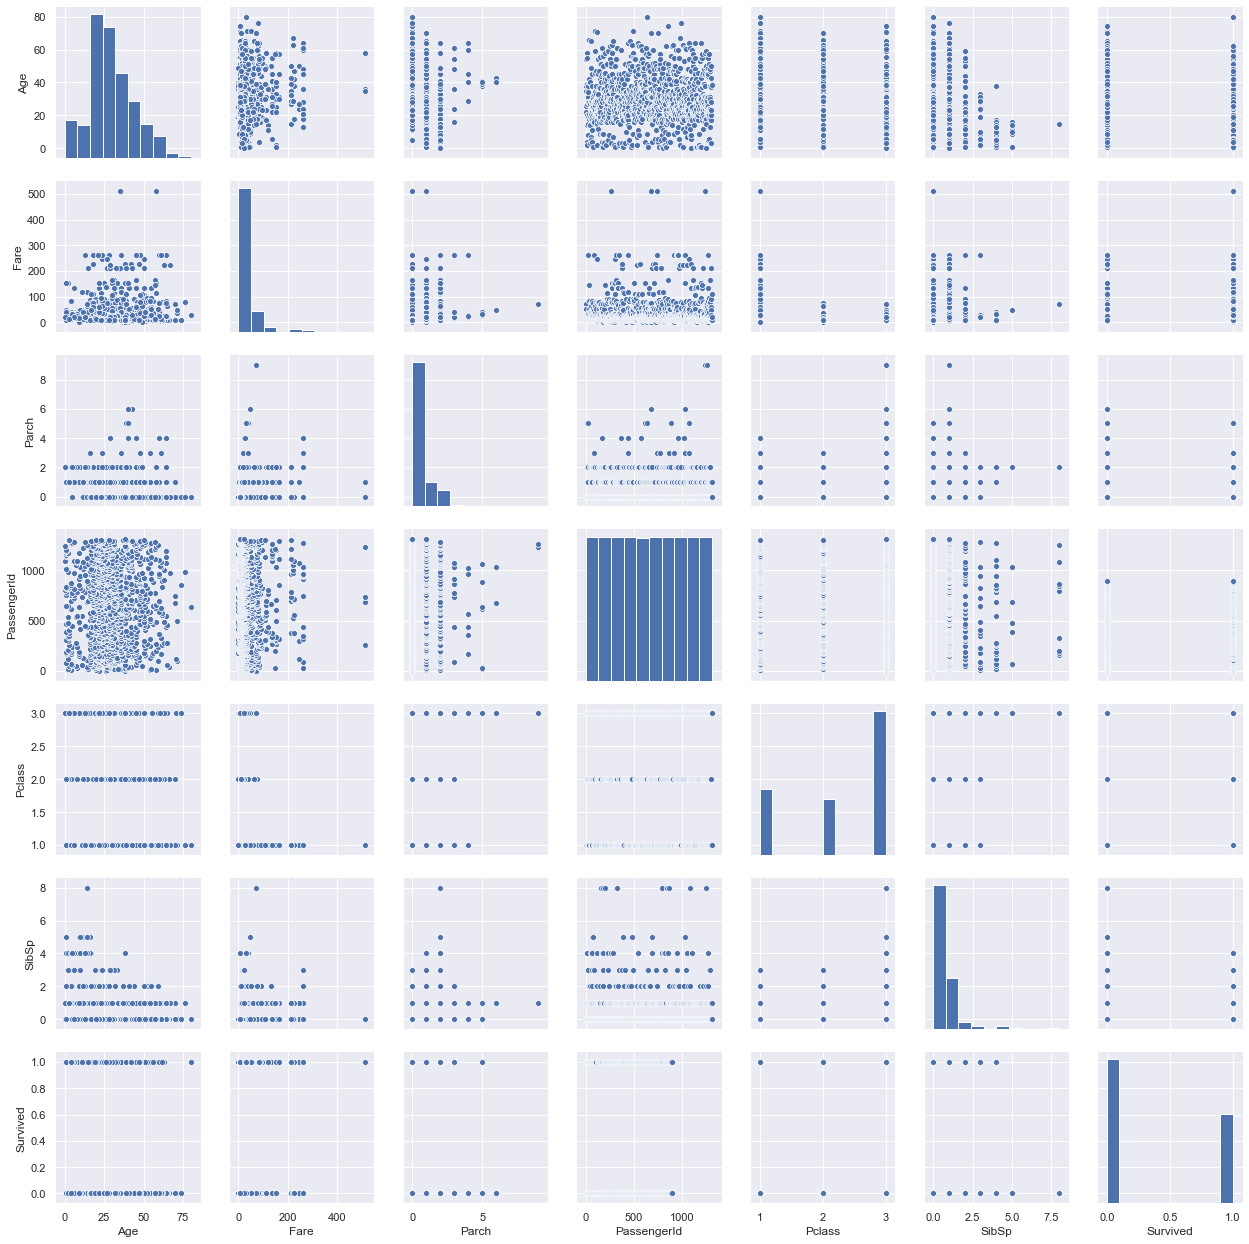

In [275]:
sns.pairplot(combined) # ggpairs() in R

Text(0.5, 1.0, 'Survived vs. Fare BoxPlot')

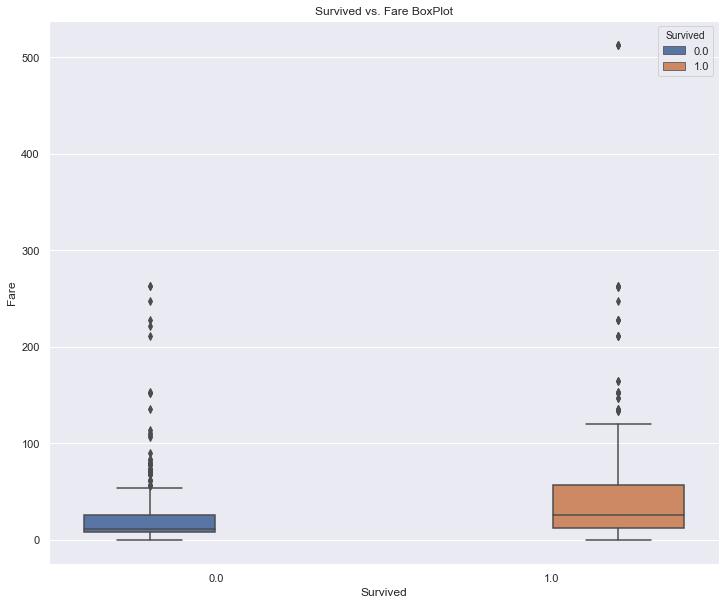

In [277]:
# A boxplot would be able to see where the quartiles end
fig = plt.figure(figsize=(12,10))

# Create boxplot
ax = sns.boxplot(x='Survived',
                 y='Fare',
                 hue='Survived',
                 data=combined)

# Set figure features
ax.set_title('Survived vs. Fare BoxPlot')

The mean is higher when the fare is higher in survival rates. There could be information on whether a higher fare price may affect the chance of survival especially with special titles.

### Age Feature

Our final feature that has NA values besides Survived (test data). Let's see how many there are.

In [280]:
# Print out the missing values
print('Missing values in the age feature: ' + str(round(combined.Age.isnull().sum()/len(combined)*100,1)) + str('%'))

Missing values in the age feature: 20.1%


Replacing it with a summary statistics may not be useful because age could determine the survival rate. Kids and older people have higher chance of survival. We could attempt to use an algorithm to see if we can model something for this feature instead. First let's plot some graphs to see how the distribution looks like for age.

Create multiple boxplots for Age.

Text(0.5, 1.0, 'Cabin vs. Age for Survival Rate')

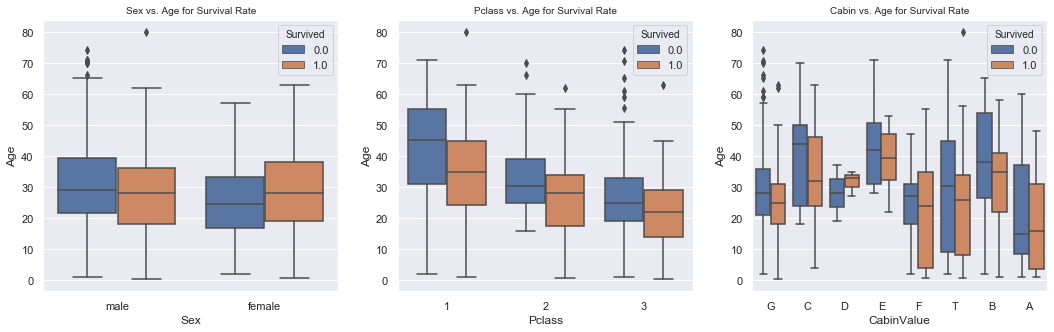

In [282]:
fig, ax = plt.subplots(figsize=(18,5), ncols=3, nrows=1)

# Create plots
ax1 = sns.boxplot(x='Sex', y='Age', hue='Survived', data=combined, ax=ax[0])
ax2 = sns.boxplot(x='Pclass', y='Age', hue='Survived', data=combined, ax=ax[1])
ax3 = sns.boxplot(x='CabinValue', y='Age', hue='Survived', data=combined, ax=ax[2])

# Set plot features
ax1.set_title('Sex vs. Age for Survival Rate', fontsize=10)
ax2.set_title('Pclass vs. Age for Survival Rate', fontsize=10)
ax3.set_title('Cabin vs. Age for Survival Rate', fontsize=10)

Based on these three plots and some inferences made from my previous work on this dataset...

These following groups have a higher survival rate than normal:
- Female
- Kids
- Older Adults
- Higher socioeconomic status people (high fares, good cabins, pclass, etc.)
- More to come such as titles, family size, child groups

Text(0, 0.5, 'Survival Frequency')

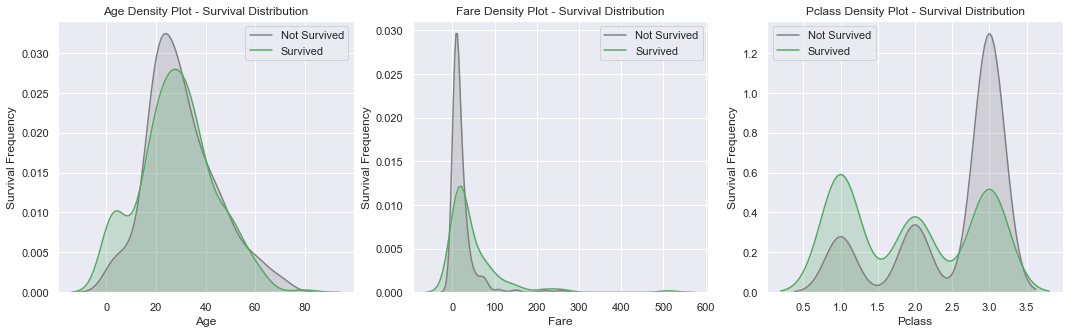

In [320]:
fig, ax = plt.subplots(figsize=(18,5), ncols=3, nrows=1)

# Check NA: combined.Age[combined.Age.notnull() & combined.Survived==1].isnull().sum()
ax1 = sns.kdeplot(combined.Age[(combined.Age.notnull()) & (combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[0])

ax1 = sns.kdeplot(combined.Age[(combined.Age.notnull()) & (combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[0])

ax2 = sns.kdeplot(combined.Fare[(combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[1])

ax2 = sns.kdeplot(combined.Fare[(combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[1])

ax3 = sns.kdeplot(combined.Pclass[(combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[2])

ax3 = sns.kdeplot(combined.Pclass[(combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[2])

# Set plot features (axes has to use .set_xlabel() instead of plt.xlabel())
ax1.set_title('Age Density Plot - Survival Distribution', fontsize=12)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Survival Frequency', fontsize=12)

ax2.set_title('Fare Density Plot - Survival Distribution', fontsize=12)
ax2.set_xlabel('Fare', fontsize=12)
ax2.set_ylabel('Survival Frequency', fontsize=12)

ax3.set_title('Pclass Density Plot - Survival Distribution', fontsize=12)
ax3.set_xlabel('Pclass', fontsize=12)
ax3.set_ylabel('Survival Frequency', fontsize=12)

Try to get the NA values out below. Fixed with parentheses. Was not getting the data before.

combined.Age[(combined.Age.notnull()) & (combined.Survived==0)].isnull().sum()